# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Mounting google drive to be able to access drive files from google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing pandas for data manipulation and analysis
import pandas as pd

In [3]:
#Reading the first dataset into a dataframe using .read_csv()
df_1=pd.read_csv("/content/drive/MyDrive/Udacity Data Analyst Nanodegree/twitter-archive-enhanced (1).csv")

In [4]:
#check the first five rows of the data
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#import requests library in order to programmatically download the second dataset via the provided link
import requests

In [6]:
#download dataset 2 programmatically by requesting from url and then saving data in working directory.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [7]:
#read dataset 2 into a dataframe from the working directory
df_2=pd.read_csv("/content/drive/MyDrive/Udacity Data Analyst Nanodegree/image-predictions.tsv", sep='\t')

In [8]:
#preview the first five rows of the dataset
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#importing glob which is useful for returning filepaths that match given patten
import glob
import json

In [ ]:
#importing important libraries to query additional data via Twitter API with the Tweepy library 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [10]:
#reading the tweet_json.text line line by line and saving it into a list first
stat = []
for tweet_json in glob.glob('/content/drive/MyDrive/Udacity Data Analyst Nanodegree/tweet_json.txt'):
    with open(tweet_json) as file:
        for line in file:
           stat.append(json.loads(line))

In [11]:
#accessing the list
stat[1]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'media': [{'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'sizes': {'large': {'h': 1600, 'resize': 'fit', 'w': 1407},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 1055},
     'small': {'h': 680, 'resize': 'fit', 'w': 598},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/0Xxu71qeIV'}],
  'symbols': [],
  'urls': [],
  'user_mentions': []},
 'extended_entities': {'media': [{'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/

In [12]:
#read the third dataset into a third dataframe, df_3
df_3=pd.DataFrame(stat, columns=['id', 'favorite_count', 'retweet_count'])

In [13]:
#checking the first five rows of the third dataframe
df_3.head()

,id,favorite_count,retweet_count
0,892420643555336193,33813,7006
1,892177421306343426,29328,5301
2,891815181378084864,22048,3480
3,891689557279858688,36938,7226
4,891327558926688256,35310,7758


In [14]:
#checking the length of df_3
len(df_3)

2327

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



###Visually Assessing df_1, df_2, df_3

In [15]:
#visually assessing dataframe 1 after accessing it manually in excel.
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
#visually assessing dataframe 2 after accessing it manually in excel.
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
#visually assessing dataframe 3 after accessing it manually in excel.
df_3

,id,favorite_count,retweet_count
0,892420643555336193,33813,7006
1,892177421306343426,29328,5301
2,891815181378084864,22048,3480
3,891689557279858688,36938,7226
4,891327558926688256,35310,7758
...,...,...,...
2322,666049248165822465,89,37
2323,666044226329800704,247,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39


###Programmatically assessing df_1, df_2, df_3

In [18]:
#function to get the sum of the total null values in a column
def emptysum(table_name):
  print(table_name.isnull().sum())

#function to get the information about different columns in a table/dataframe
def checkinfo(table_name):
  print(table_name.info())

#function to get the summary statistics of different columns in a table/dataframe
def describing(table_name):
  print(table_name.describe())

In [19]:
#saving df_1, df_2 and df_3 together in a list to be able to iterate through all of them at once.
df=[df_1, df_2, df_3]

In [20]:
#iterating through  df_1, df_2 and df_3 to get the sum of missing values in all their columns at once.
for data in df:
  print(emptysum(data), '\n', '\n')

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64
None 
 

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64
None 
 

id                0
favorite_count    0
retweet_count     0
dtype: int64
None 
 



In [21]:
#iterating through  df_1, df_2 and df_3 to get the information about all their columns at once.
for data in df:
  print(checkinfo(data), '\n', '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
#iterating through  df_1, df_2 and df_3 to get the summary statistics for all their numerical columns at once.
for data in df:
  print(describing(data), '\n', '\n')

           tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17

After getting a surprising maximum number of 1776 from the rating_numerators, it is important to single out the row and check why it was rated as such.

In [23]:
#locating the row with rating_numerator of 1776 in df_1
df_1[df_1['rating_numerator']==1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [24]:
#locating all rating_numerators greater than 20 in df_1
df_1[df_1['rating_numerator']>=20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


These rating numerators above 20 suggest that some ratings may be group ratings

In [25]:
#locating rating_denominators greater than 10 in df_1 to confirm the group rating hypothesis.
df_1[df_1['rating_denominator']>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [26]:
#locating the rating_denominator less than or equal to zero after getting minimum value as 0 in the rating
#numerator from using the describing function
df_1[df_1['rating_denominator']<=0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [27]:
#checking for duplicates in df_1
df_1[df_1.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
#checking for duplicates in df_2
df_2[df_2.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [29]:
#checking for duplicates in df_3
df_3[df_3.id.duplicated()]

,id,favorite_count,retweet_count


Owing to the fact that retweets of a post have differnt ids from the id of the original poster, they won't be recoginzed as duplicates but because we want to make use of only original ratings, we need to check all the rows that contain retweets in df_1

In [30]:
#assessing and locating rows with retweets
import pandas as pd

df_1[pd.notnull(df_1['retweeted_status_user_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


### Quality issues
1. There are several columns with missing data in df_1, such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,expanded_urls

2. "None" has been used to represent empty records in "name", "doggo", "fluffer", "pupper", and "puppo" column which makes it seem as if the records were never empty even when it was accessed programmatically.

3. Incorrect data types for columns tweet_id, in_reply_to_status_id, in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp in df_1, then tweet_id in df_2 and id in df_3.

4. Some urls under extended urls column contain two urls separated by ',', this error is making the urls lead to a page that doesn't exist.

5. Some dogs are in groups and have therefore been rated more than over 10, there may need to be an extra column to indicate these dogs.

6. Non-Uniform name for "pups" in the df_1 table, "pups" is represented as "pupper" and "puppo", hence the two columns may need to be merged and all the values replaced with "pups".

7. There are missing records in the "doggo", "floofer", "puppo" and "pupper" columns of df_1. 

8. There are missing records in the "name" column of df_1 and some dogs have been wrongly named as "a", "an", "the".

### Tidiness issues
1. The "floofer", "doggo", "pups" column are meant to all be in just one column, they are all dog stages nut they've been spread across multiple columns.

2. There is a link attached to the end of all the texts in each row of the 'text' column in df_1. The link needs to be extracted out and turned into an individual column on its own.

3. Information about the same set of tweets is spread across three dataframes, the dataframes needs to be merged for the data to be considered tidy.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
df_1clean=df_1.copy()
df_2clean=df_2.copy()
df_3clean=df_3.copy()

### Issue #1: There are several columns with missing data in df_1, such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,expanded_urls


#### Define:

After a thorough visual assessment, it was observed that columns such as in_reply_to_status_id, in_reply_to_user_id have a high amount of missing data since the rows they represent just show that the tweets were made in response to other tweets, these columns may need to be dropped using .drop() method since they are not so much important to the data and after confirming that a large proportion of the column is missing.

Rows corresponsing to retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, will need to be dropped because these rows are majorly retweets, since we want original ratings and no retweets.

The rows corresponding to the empty records under expanded urls column will also be dropped because after much visual studying, it was discovered that these specific empty urls belong mostly to dogs that had previously been rated but later downgraded or upgraded or reply to other tweets.

#### Code

In [32]:
#getting all the rows where retweeted status id is not empty which are also rows that contain retweets
import numpy as np
df_1clean[df_1clean["retweeted_status_id"].isnull()!=True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [33]:
#getting the indexes of rows with retweets
df_1clean[df_1clean["retweeted_status_id"].isnull()!=True].index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [34]:
#dropping roows containing retweets using the indexes gotten from the code output above
df_1clean.drop(df_1clean[df_1clean["retweeted_status_id"].isnull()!=True].index, inplace=True)

In [35]:
#drooping all columns related to the retweets rows since they are now empty
df_1clean.drop(columns=["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"], inplace=True)

In [36]:
#dropping rows where the extended urls are missing
df_1clean.drop(df_1clean[df_1clean["expanded_urls"].isnull()==True].index, inplace=True)

In [37]:
#dropping the in_reply to columns since they won't be that useful in the data
df_1clean.drop(columns=["in_reply_to_status_id","in_reply_to_user_id"], inplace=True)

#### Test



In [38]:
#checking df oncce again to ensure they no longer have missing values
df_clean=[df_1clean, df_2clean, df_3clean]
for data in df_clean:
  print(emptysum(data), '\n', '\n')

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64
None 
 

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64
None 
 

id                0
favorite_count    0
retweet_count     0
dtype: int64
None 
 



### Issue #2: "None" has been used to represent empty records in "name", "doggo", "fluffer", "pupper", and "puppo" column in df_1 which makes it seem as if the records were never empty even when it was accessed programmatically.

#### Define 
In everywhere "None" is pressent, it needs to be replaced with np.nan so that it gets clearer that the records are missing and they can be dealt with accordingly.

#### Code

In [39]:
#indexing all rows and columns where missing values have been recorded ad 'None'
df_1clean[df_1clean.iloc[:,:]=="None"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None
2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None


In [40]:
#Replacing all "None" with "np.nan" to indicate the records are missing
df_1clean.iloc[:,:].replace('None', '', inplace=True)

#### Test

In [41]:
#checking to confirm that the "None" values have changed to Nan
df_1clean[df_1clean.iloc[:,:]=="None"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#getting the sum of the numm values in all columns of df_1
df_1clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #3: Incorrect data types for columns in_reply_to_status_id, in_reply_to_user_id,timestamp,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, doggo, floofer, pupper, puppo in df_1.

#### Define 
For all columns with incorrect datatypes, the columns need to be changed back to the correct datatypes by using .astype() where necessary and then type casting where necessary, deleted columns no longerneed to be addressed

#### Code

In [43]:
#changing the timestamp column from type object to type datetime
df_1clean.timestamp = pd.to_datetime(df_1clean.timestamp)
#changing "doggo", "pupper", "puppo", "floofer" columns to categorical columns
df_1clean.doggo = df_1clean.doggo.astype('category')
df_1clean.floofer = df_1clean.floofer.astype('category')
df_1clean.pupper = df_1clean.pupper.astype('category')
df_1clean.puppo = df_1clean.puppo.astype('category')

#### Test

In [44]:
#confirming if the change in datatypes have been effected by changing the information as regards column in df_1clean
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                2117 non-null   object             
 8   doggo               2117 non-null   category           
 9   floofer             2117 non-null   category           
 10  pupper              2117 non-null   category           
 11  puppo               2117 non-null   category           
dtypes: category(4), datetime64[ns, UTC

### Issue #4: Some urls under extended urls column contain two urls separated by ',', this error is making the urls lead to a page that doesn't exist 

#### Define 
For all URLS affected, the urls need to be splitted into two using the '.str.split()' method, thereby making the urls valid. After spliiting, we need to only retain links which contain "twitter".

#### Code

In [45]:
#splitting the expanded urls columns by ',' 
adress=df_1clean.expanded_urls.str.split(',', expand=True)

In [46]:
#checking the first five rows of the new data created from splitting expanded urls
adress.head()

,0,1,2,3,4
0,https://twitter.com/dog_rates/status/892420643...,None,None,None,None
1,https://twitter.com/dog_rates/status/892177421...,None,None,None,None
2,https://twitter.com/dog_rates/status/891815181...,None,None,None,None
3,https://twitter.com/dog_rates/status/891689557...,None,None,None,None
4,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None


In [47]:
#rename columns in the address data to make them more accessible
adress.rename(columns={0: 'original', 1:'copy1', 2:'copy2', 3:'copy3', 4:'copy4'}, inplace = True)

In [48]:
#get rows where "original" column in adress is the same as the "copy1" column
adress[adress['original']==adress['copy1']]

,original,copy1,copy2,copy3,copy4
4,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None
7,https://twitter.com/dog_rates/status/890729181...,https://twitter.com/dog_rates/status/890729181...,None,None,None
10,https://twitter.com/dog_rates/status/890006608...,https://twitter.com/dog_rates/status/890006608...,None,None,None
13,https://twitter.com/dog_rates/status/889638837...,https://twitter.com/dog_rates/status/889638837...,None,None,None
17,https://twitter.com/dog_rates/status/888804989...,https://twitter.com/dog_rates/status/888804989...,None,None,None
...,...,...,...,...,...
2058,https://twitter.com/dog_rates/status/671347597...,https://twitter.com/dog_rates/status/671347597...,None,None,None
2073,https://twitter.com/dog_rates/status/670995969...,https://twitter.com/dog_rates/status/670995969...,https://twitter.com/dog_rates/status/670995969...,None,None
2084,https://twitter.com/dog_rates/status/670807719...,https://twitter.com/dog_rates/status/670807719...,https://twitter.com/dog_rates/status/670807719...,None,None
2205,https://twitter.com/dog_rates/status/668633411...,https://twitter.com/dog_rates/status/668633411...,None,None,None


In [49]:
#replace rows in "original"(column which do not have the string "twitter") by rows in "copy1"
for row in adress['original']:
  for ind in adress['original'].index:
    if "twitter" not in row:
      adress['original']=adress['original'].replace(row, adress._get_value(ind, 'copy1'))
    else:
      pass

In [50]:
#confirm the replacement has been made by checking if any row in "original" still contains the word "twitter"
adress['original'].index[~adress['original'].str.contains("twitter")]

Int64Index([], dtype='int64')

In [51]:
#print all rows where the string "twitter" is contained in the "original" column
adress[adress['original'].str.contains("twitter")==True]

,original,copy1,copy2,copy3,copy4
0,https://twitter.com/dog_rates/status/892420643...,None,None,None,None
1,https://twitter.com/dog_rates/status/892177421...,None,None,None,None
2,https://twitter.com/dog_rates/status/891815181...,None,None,None,None
3,https://twitter.com/dog_rates/status/891689557...,None,None,None,None
4,https://twitter.com/dog_rates/status/891327558...,https://twitter.com/dog_rates/status/891327558...,None,None,None
...,...,...,...,...,...
2351,https://twitter.com/dog_rates/status/666049248...,None,None,None,None
2352,https://twitter.com/dog_rates/status/666044226...,None,None,None,None
2353,https://twitter.com/dog_rates/status/666033412...,None,None,None,None
2354,https://twitter.com/dog_rates/status/666029285...,None,None,None,None


In [52]:
#checking to see if there are missing values represented by "None" in the "original" column
adress[adress['original']=='None']

,original,copy1,copy2,copy3,copy4


In [53]:
#dropping other copy columns since they'll only cause duplicates
adress.drop(columns=['copy1', 'copy2', 'copy3', 'copy4'], inplace=True)

In [54]:
#checking the first few rows of the adjusted data
adress.head()

,original
0,https://twitter.com/dog_rates/status/892420643...
1,https://twitter.com/dog_rates/status/892177421...
2,https://twitter.com/dog_rates/status/891815181...
3,https://twitter.com/dog_rates/status/891689557...
4,https://twitter.com/dog_rates/status/891327558...


In [55]:
#assigning the adjusted data to a new column inside df_1
df_1clean['originalexpanded_urls']=adress['original']

In [56]:
#dropping the expanded urls column which wasnt worked on
df_1clean.drop(columns=['expanded_urls'], inplace=True)

#### Test

In [57]:
#confirming if there is any row in original expanded urls that doesn;t contain "twitter" 
df_1clean[df_1clean['originalexpanded_urls'].str.contains("twitter")==False]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,originalexpanded_urls


### Issue #5: Some dogs are in groups and have therefore been rated more than over 10, there may need to be an extra column to indicate these dogs.

#### Define 
After assessing visually, it was discovered that some ratings are more than one, this is the major reason why we had rating_denominators greater than 10, to clarify this issues, one more column named group_ratings which will contain boolean value True to signify that the rating is more than one and False to signify that the rating is for just one dog will be created in Excel using filters like "text contains", any of "for all","for both", "&amp", "/10s", "pet all", "Both", "two", "for everyone", "for each", "all",  on the text column.Thereafter, the data will be read back into this workspace and empty rows in the column will be added programmatically using .fill() or .replace() method. 

First, the data needs to be saved into a csv file.

#### Code

In [58]:
#saving df_1 in a csv file in working directory
df_1clean.to_csv("/content/drive/MyDrive/Udacity Data Analyst Nanodegree/enhancedcleantwitter.csv")

In [59]:
#reading in csv file which has now been worked on
df_1clean=pd.read_csv("/content/drive/MyDrive/Udacity Data Analyst Nanodegree/workenhancedcleantwitter.csv")

In [60]:
#checking the first five rows of the csv
df_1clean.head()

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,originalexpanded_urls
0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...
2,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...
3,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...
4,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...


In [61]:
#getting rows with denominators greater than 10 to get the index
df_1clean[df_1clean['rating_denominator']>10]

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,originalexpanded_urls
341,8.206902e+17,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,84,70,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...
702,7.584672e+17,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,165,150,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...
857,7.403732e+17,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,9,11,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...
908,7.311560e+17,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,True,204,170,this,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...
953,7.229746e+17,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,True,4,20,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...
990,7.164391e+17,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,50,50,Bluebert,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...
1016,7.139006e+17,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,99,90,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...
1041,7.106587e+17,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,80,80,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...
1061,7.091984e+17,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",True,45,50,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...
1136,7.040548e+17,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,60,50,a,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...


After having a close look at the data, we can still see that some rating_denominators that are greater than 10 are still yet to be filed under group ratings. While some are actually ratings for one dog, others are ratings from more than one dog, this can be seen evidently in the text presented above. Therefore since the indexes are known already, therefore this can be filled programmatically using .loc()

In [62]:
#replacing empty rows in group ratings with "True" according to the index gotten from above after 
#confirming they are group ratings.
lst=[341, 702, 1016, 1041, 1136, 1552]

for x in lst:
  df_1clean.loc[x,"group ratings"]=True

In [63]:
#confirming if the null values have been replaced with "True" at the appropriate rows
df_1clean[df_1clean['rating_denominator']>10]

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,originalexpanded_urls
341,8.206902e+17,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,True,84,70,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...
702,7.584672e+17,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,True,165,150,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...
857,7.403732e+17,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,9,11,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...
908,7.311560e+17,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,True,204,170,this,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...
953,7.229746e+17,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,True,4,20,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...
990,7.164391e+17,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,50,50,Bluebert,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...
1016,7.139006e+17,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,True,99,90,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...
1041,7.106587e+17,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,True,80,80,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...
1061,7.091984e+17,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",True,45,50,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...
1136,7.040548e+17,2016-02-28 21:25:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,True,60,50,a,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...


In [64]:
#replacing all other columns in the group ratings column with "False"
df_1clean['group ratings'].replace(np.nan, False, inplace=True)

#### Test

In [65]:
#checking the first 20 rows of  the df_1clean column
df_1clean.head(20)

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,originalexpanded_urls
0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,13,10,Phineas,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,False,13,10,Tilly,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...
2,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,False,12,10,Archie,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...
3,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,13,10,Darla,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...
4,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,False,12,10,Franklin,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...
5,8.910880e+17,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,False,13,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...
6,8.909719e+17,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,False,13,10,Jax,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...
7,8.907292e+17,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,False,13,10,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...
8,8.906092e+17,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,False,13,10,Zoey,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...
9,8.902403e+17,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,False,14,10,Cassie,doggo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...


In [66]:
#checking if the group ratings column no longer contains null values
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   float64
 1   timestamp              2117 non-null   object 
 2   source                 2117 non-null   object 
 3   text                   2117 non-null   object 
 4   group ratings          2117 non-null   bool   
 5   rating_numerator       2117 non-null   int64  
 6   rating_denominator     2117 non-null   int64  
 7   name                   1495 non-null   object 
 8   doggo                  84 non-null     object 
 9   floofer                10 non-null     object 
 10  pupper                 232 non-null    object 
 11  puppo                  24 non-null     object 
 12  originalexpanded_urls  2117 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 200.7+ KB


### Issue #6: Non-Uniform name for "pups" in the df_1 table, "pups" is represented as "pupper" and "puppo", hence the two columns may need to be merged and all the values replaced with "pups".

#### Define 
There is a non-uniform name for "pups", which has been splitted into two columns as "pupper" and "puppo", to solve this issue, the two columns need to be merged using "+", thereafter, the values need to be changed to "pups"

####Code

In [67]:
#assigning all the vaalues in the pupper column to a new column named "pups"
df_1clean["pups"] = df_1clean['pupper']

In [68]:
#replacing empty rows in pups with "puppo" baed on row wise indexing from column "puppo"
df_1clean.loc[((df_1clean['puppo'] == 'puppo') | (df_1clean['pups']==np.nan)), 'pups'] = 'puppo'

In [69]:
#replacing all values in the "pups" column with "pups" for the purpose of uniformity
df_1clean["pups"].replace(['pupper', 'puppo'], 'pups', inplace=True)

In [70]:
#dropping the pupper and puppo column
df_1clean.drop(columns=['pupper', 'puppo'], inplace=True)

####Test

In [71]:
#confirming the new "pups" column by checking information of all columns in df_1clean.
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   float64
 1   timestamp              2117 non-null   object 
 2   source                 2117 non-null   object 
 3   text                   2117 non-null   object 
 4   group ratings          2117 non-null   bool   
 5   rating_numerator       2117 non-null   int64  
 6   rating_denominator     2117 non-null   int64  
 7   name                   1495 non-null   object 
 8   doggo                  84 non-null     object 
 9   floofer                10 non-null     object 
 10  originalexpanded_urls  2117 non-null   object 
 11  pups                   256 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 184.1+ KB


In [72]:
#getting the firt 40 rows of the df_1clean column
df_1clean.head(40)

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,originalexpanded_urls,pups
0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,13,10,Phineas,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,NaN
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,False,13,10,Tilly,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,NaN
2,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,False,12,10,Archie,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,NaN
3,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,13,10,Darla,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,NaN
4,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,False,12,10,Franklin,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,NaN
5,8.910880e+17,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,False,13,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,NaN
6,8.909719e+17,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,False,13,10,Jax,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,NaN
7,8.907292e+17,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,False,13,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,NaN
8,8.906092e+17,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,False,13,10,Zoey,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,NaN
9,8.902403e+17,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,False,14,10,Cassie,doggo,NaN,https://twitter.com/dog_rates/status/890240255...,NaN


### Issue #7: There are missing records in the "doggo", "floofer", "puppo" and "pupper" columns of df_1.

#### Define 
To try as much as possible to fill the missing columns, we could use the text columns as reference. Wherever in the text column that contains the word "pup" or "PUP" or "Pup", then the pups column should be filled with "pups", same goes for doggo and floofer

####Code

In [73]:
#filling the missing values in the "doggo" column based on the condition that "text" column contains any of
#"doggo", "Doggo", "DOGGO", considering the case-sensitivity of python
df_1clean.loc[(df_1clean['text'].str.contains('doggo') | df_1clean['text'].str.contains('Doggo') |
          df_1clean['text'].str.contains('DOGGO')), 'doggo'] = 'doggo'

In [74]:
#checking the rows that contain any of "pup", "Pup", "PUP", considering the case-sensitivity of python
df_1clean[(df_1clean['text'].str.contains('pup') | df_1clean['text'].str.contains('PUP') |
          df_1clean['text'].str.contains('Pup'))]

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,originalexpanded_urls,pups
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,False,13,10,Tilly,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,NaN
9,8.902403e+17,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,False,14,10,Cassie,doggo,NaN,https://twitter.com/dog_rates/status/890240255...,NaN
12,8.896654e+17,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,False,13,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,pups
14,8.895311e+17,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,False,13,10,Stuart,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,pups
26,8.867369e+17,2017-07-16 23:58:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mingus. He's a wonderful father to his...,False,13,10,Mingus,NaN,NaN,https://twitter.com/dog_rates/status/886983233...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2039,6.674373e+17,2015-11-19 20:20:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,False,10,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667437278...,NaN
2043,6.673692e+17,2015-11-19 15:49:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a neat pup. Very white. Cool shad...,False,10,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667369227...,NaN
2068,6.668268e+17,2015-11-18 03:54:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,False,12,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,NaN
2083,6.664307e+17,2015-11-17 01:40:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,False,6,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666430724...,NaN


In [75]:
#filling the missing values in the "pup" column based on the condition that "text" column contains any of
#"pup", "Pup", "PUP", considering the case-sensitivity of python
df_1clean.loc[(df_1clean['text'].str.contains('pup') | df_1clean['text'].str.contains('PUP') |
          df_1clean['text'].str.contains('Pup')), 'pups'] = 'pups'

In [76]:
#checking the rows that contain any of 'floof', 'Floof, considering the case-sensitivity of python
df_1clean[(df_1clean['text'].str.contains('floof') | df_1clean['text'].str.contains('Floof'))]

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,originalexpanded_urls,pups
24,8.871014e+17,2017-07-18 00:07:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,False,12,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,NaN
42,8.833607e+17,2017-07-07 16:22:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,False,13,10,Grizzwald,NaN,floofer,https://twitter.com/dog_rates/status/883360690...,pups
49,8.819066e+17,2017-07-03 16:04:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,False,12,10,Rey,NaN,NaN,https://twitter.com/dog_rates/status/881906580...,NaN
163,8.540102e+17,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",False,11,10,NaN,doggo,floofer,https://twitter.com/dog_rates/status/854010172...,NaN
341,8.206902e+17,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,True,84,70,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,NaN
453,8.003883e+17,2016-11-20 17:20:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,False,12,10,Doc,NaN,floofer,https://twitter.com/dog_rates/status/800388270...,NaN
473,7.960801e+17,2016-11-08 20:00:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,False,12,10,Yogi,NaN,NaN,https://twitter.com/dog_rates/status/796080075...,NaN
479,7.943323e+17,2016-11-04 00:15:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,False,12,10,Nimbus,NaN,NaN,https://twitter.com/dog_rates/status/794332329...,NaN
571,7.805435e+17,2016-09-26 23:04:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,False,12,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780543529...,NaN
573,7.801921e+17,2016-09-25 23:47:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,False,11,10,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780192070...,NaN


In [77]:
#filling the missing values in the "floofer" column based on the condition that "text" column contains any of
# of "floof", "Floof", considering the case-sensitivity of python
df_1clean.loc[(df_1clean['text'].str.contains('floof') | df_1clean['text'].str.contains('Floof')),
              'floofer']='floofer'

In [78]:
#replacing all other missing values in "doggo", "floofer", "pups", with "Not Doggo", "Not floofer", "Not Pups"
""" for x in df_1clean['doggo']:
  df_1clean['doggo'].replace(np.nan, "Not Doggo", inplace=True)

for y in df_1clean['floofer']:
  df_1clean['floofer'].replace(np.nan, "Not floofer", inplace=True)

for z in df_1clean['pups']:
  df_1clean['pups'].replace(np.nan, "Not Pups", inplace=True)"""

' for x in df_1clean[\'doggo\']:\n  df_1clean[\'doggo\'].replace(np.nan, "Not Doggo", inplace=True)\n\nfor y in df_1clean[\'floofer\']:\n  df_1clean[\'floofer\'].replace(np.nan, "Not floofer", inplace=True)\n\nfor z in df_1clean[\'pups\']:\n  df_1clean[\'pups\'].replace(np.nan, "Not Pups", inplace=True)'

####Test

In [79]:
#confirming the change has been made by checking the information of the columns in df_1clean
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   float64
 1   timestamp              2117 non-null   object 
 2   source                 2117 non-null   object 
 3   text                   2117 non-null   object 
 4   group ratings          2117 non-null   bool   
 5   rating_numerator       2117 non-null   int64  
 6   rating_denominator     2117 non-null   int64  
 7   name                   1495 non-null   object 
 8   doggo                  92 non-null     object 
 9   floofer                39 non-null     object 
 10  originalexpanded_urls  2117 non-null   object 
 11  pups                   522 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 184.1+ KB


### Issue #8: There are missing records in the "name" column of df_1 and some dogs have been wrongly named as "a", "an", "the".

#### Define 
Since there is no way to get the names of the dogs in the missing rows, all missing record will be renamed as "Unnamed", also, all the wrongly named dogs will be renamed as "Unnamed" to allow for uniformity. This will be done using .replace()

####Code

In [80]:
#renaming all wrongly named dogs to "Unnamed"
df_1clean['name']=df_1clean['name'].replace([np.nan, 'a', 'an', 'the'], 'Unnamed')

####Test

In [81]:
#checking to see if the renaming was effected
df_1clean[df_1clean['name']=='a']

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,originalexpanded_urls,pups


In [82]:
#checking to see if the renaming was effected
df_1clean[df_1clean['name']=='an']

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,originalexpanded_urls,pups


In [83]:
#checking to see if the renaming was effected
df_1clean[df_1clean['name']=='the']

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,originalexpanded_urls,pups


In [84]:
#confirming there are no more missing values in df_1clean by checking the sum of missing values of the columns
df_1clean.isnull().sum()

tweet_id                    0
timestamp                   0
source                      0
text                        0
group ratings               0
rating_numerator            0
rating_denominator          0
name                        0
doggo                    2025
floofer                  2078
originalexpanded_urls       0
pups                     1595
dtype: int64

In [85]:
#poping the "pups" column
move_column = df_1clean.pop('pups')
#reinserting the popped column at index 10
df_1clean.insert(10, 'pups', move_column)

In [86]:
# reconverting the timestamp column from object type to datetime
df_1clean.timestamp = pd.to_datetime(df_1clean.timestamp)


###Tidiness Issues

### Issue #1:The "floofer", "doggo", "pups" column are meant to all be in just one column, they are all dog stages nut they've been spread across multiple columns.

#### Define 
For a data to be tidy, each variable needs to be a column and Each  obervation a row and each observational unit must be a table. Therefore the "doggo","floofer" and "pups" columns have to be combined into one column using "+" between the columns

####Code

In [87]:
#replacing np.nan with '', to prepare them for proper combination
df_1clean.doggo.replace(np.nan, '', inplace=True)
df_1clean.floofer.replace(np.nan, '', inplace=True)
df_1clean.pups.replace(np.nan, '', inplace=True)

In [88]:
#combining the dog stages columns into just one column
df_1clean['dog_stage']=df_1clean.doggo+df_1clean.floofer+df_1clean.pups


In [89]:
#checking if the change has been effected
df_1clean

,tweet_id,timestamp,source,text,group ratings,rating_numerator,rating_denominator,name,doggo,floofer,pups,originalexpanded_urls,dog_stage
0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,13,10,Phineas,,,,https://twitter.com/dog_rates/status/892420643...,
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,False,13,10,Tilly,,,pups,https://twitter.com/dog_rates/status/892177421...,pups
2,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,False,12,10,Archie,,,,https://twitter.com/dog_rates/status/891815181...,
3,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,13,10,Darla,,,,https://twitter.com/dog_rates/status/891689557...,
4,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,False,12,10,Franklin,,,,https://twitter.com/dog_rates/status/891327558...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,6.660492e+17,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,False,5,10,Unnamed,,,,https://twitter.com/dog_rates/status/666049248...,
2113,6.660442e+17,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,False,6,10,Unnamed,,,,https://twitter.com/dog_rates/status/666044226...,
2114,6.660334e+17,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,False,9,10,Unnamed,,,pups,https://twitter.com/dog_rates/status/666033412...,pups
2115,6.660293e+17,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,True,7,10,Unnamed,,,,https://twitter.com/dog_rates/status/666029285...,


In [90]:
#checking the values in the dog_stage column
df_1clean['dog_stage'].value_counts()

                1488
pups             500
doggo             71
floofer           34
doggopups         19
flooferpups        3
doggofloofer       2
Name: dog_stage, dtype: int64

In [91]:
#separating double values with ,
df_1clean.loc[df_1clean.dog_stage=='doggopups', 'dog_stage']="doggo, pups"
df_1clean.loc[df_1clean.dog_stage=='doggofloofer', 'dog_stage']="doggo, floofer"
df_1clean.loc[df_1clean.dog_stage=='flooferpups', 'dog_stage']="floofer, pups"

In [92]:
#confirming the changes have been made
df_1clean['dog_stage'].value_counts()

                  1488
pups               500
doggo               71
floofer             34
doggo, pups         19
floofer, pups        3
doggo, floofer       2
Name: dog_stage, dtype: int64

In [93]:
#dropping extra unneeded columns
df_1clean.drop(columns=['doggo', 'floofer', 'pups'], inplace=True)

In [94]:
#filling missing values in the dog_stage column
df_1clean['dog_stage'].replace('', 'NoStage', inplace=True)

In [95]:
#reconverting the "dog_stage" from object type to categorical variables
df_1clean.dog_stage = df_1clean.dog_stage.astype('category')

###Test

In [96]:
#checking if all the changes have been made
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2117 non-null   float64            
 1   timestamp              2117 non-null   datetime64[ns, UTC]
 2   source                 2117 non-null   object             
 3   text                   2117 non-null   object             
 4   group ratings          2117 non-null   bool               
 5   rating_numerator       2117 non-null   int64              
 6   rating_denominator     2117 non-null   int64              
 7   name                   2117 non-null   object             
 8   originalexpanded_urls  2117 non-null   object             
 9   dog_stage              2117 non-null   category           
dtypes: bool(1), category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 136.9+ KB


### Issue #2:There is a link attached to the end of all the texts in each row of the 'text' column in df_1. The link needs to be extracted out and turned into an individual column on its own.

#### Define 
Links attached to the texts in 'text' column in df_1 need to be extracted out and made a column by making use of regular expression.

####Code

In [97]:
#extracting links from the text column using regular expression and assigning it to a new column 
import re

df_1clean['tweetlink'] = df_1clean.text.apply(lambda x: re.findall('https?:\/\/t\.co\/\w+', x))

In [98]:
#creating a new column "text1" by cleaning off the extracted link from the back of the text column
df_1clean['text1']=df_1clean['text'].str[:-len('https://t.co/MgUWQ76dJU')]

In [99]:
#checking the first row of the newly created column "text1"
df_1clean['text1'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

In [100]:
#dropping the text column which has already been replaced with text1 column
df_1clean.drop(columns=['text'], inplace=True)

In [101]:
#renaming text1 column to text
df_1clean.rename(columns={'text1':'text'}, inplace=True)

In [102]:
#confirming the renaming has been done by checking the first five rows of df_1clean
df_1clean.head()

,tweet_id,timestamp,source,group ratings,rating_numerator,rating_denominator,name,originalexpanded_urls,dog_stage,tweetlink,text
0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,10,Phineas,https://twitter.com/dog_rates/status/892420643...,NoStage,[https://t.co/MgUWQ76dJU],This is Phineas. He's a mystical boy. Only eve...
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,10,Tilly,https://twitter.com/dog_rates/status/892177421...,pups,[https://t.co/0Xxu71qeIV],This is Tilly. She's just checking pup on you....
2,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,12,10,Archie,https://twitter.com/dog_rates/status/891815181...,NoStage,[https://t.co/wUnZnhtVJB],This is Archie. He is a rare Norwegian Pouncin...
3,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,10,Darla,https://twitter.com/dog_rates/status/891689557...,NoStage,[https://t.co/tD36da7qLQ],This is Darla. She commenced a snooze mid meal...
4,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,12,10,Franklin,https://twitter.com/dog_rates/status/891327558...,NoStage,[https://t.co/AtUZn91f7f],This is Franklin. He would like you to stop ca...


In [103]:
#poping the "text" column
move_text=df_1clean.pop('text')
#reinserting the popped column at index 5
df_1clean.insert(5, 'text', move_text)

####Test

In [104]:
#confirming the changes have been made
df_1clean.head()

,tweet_id,timestamp,source,group ratings,rating_numerator,text,rating_denominator,name,originalexpanded_urls,dog_stage,tweetlink
0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Phineas. He's a mystical boy. Only eve...,10,Phineas,https://twitter.com/dog_rates/status/892420643...,NoStage,[https://t.co/MgUWQ76dJU]
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Tilly. She's just checking pup on you....,10,Tilly,https://twitter.com/dog_rates/status/892177421...,pups,[https://t.co/0Xxu71qeIV]
2,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,12,This is Archie. He is a rare Norwegian Pouncin...,10,Archie,https://twitter.com/dog_rates/status/891815181...,NoStage,[https://t.co/wUnZnhtVJB]
3,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Darla. She commenced a snooze mid meal...,10,Darla,https://twitter.com/dog_rates/status/891689557...,NoStage,[https://t.co/tD36da7qLQ]
4,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,12,This is Franklin. He would like you to stop ca...,10,Franklin,https://twitter.com/dog_rates/status/891327558...,NoStage,[https://t.co/AtUZn91f7f]


In [105]:
#checking the first row of the created column "text"
df_1clean['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 "

In [106]:
#renaming the id column in df_3 so that it matches with "tweet_id" in df_1 and df_2
df_3clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [107]:
#changing the datatype for tweet_id in df_1clean to integer
df_1clean['tweet_id']=df_1clean['tweet_id'].astype('int')

### Issue #3:Information about the same set of tweets is spread across three dataframes, the dataframes needs to be merged for the data to be considered tidy.

###Define: Merge the three dataframes "df_1clean", "df_2clean" and "df_3clean" into a master dataframe using pd.merge() and "how" argument

###Code

In [108]:
#merging the three dataframes df_1clean, df_2clean and df_3clean into a master dataset
final_csv=pd.merge(pd.merge(df_1clean,df_2clean,on='tweet_id', how='left'),df_3clean,on='tweet_id', how='left')

###Test

In [109]:
#checking the master dataset information
final_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2117 non-null   int64              
 1   timestamp              2117 non-null   datetime64[ns, UTC]
 2   source                 2117 non-null   object             
 3   group ratings          2117 non-null   bool               
 4   rating_numerator       2117 non-null   int64              
 5   text                   2117 non-null   object             
 6   rating_denominator     2117 non-null   int64              
 7   name                   2117 non-null   object             
 8   originalexpanded_urls  2117 non-null   object             
 9   dog_stage              2117 non-null   category           
 10  tweetlink              2117 non-null   object             
 11  jpg_url                1122 non-null   object           

In [110]:
#checking the master dataset
final_csv.head()

,tweet_id,timestamp,source,group ratings,rating_numerator,text,rating_denominator,name,originalexpanded_urls,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336320,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Phineas. He's a mystical boy. Only eve...,10,Phineas,https://twitter.com/dog_rates/status/892420643...,NoStage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,892177421306343424,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Tilly. She's just checking pup on you....,10,Tilly,https://twitter.com/dog_rates/status/892177421...,pups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,12,This is Archie. He is a rare Norwegian Pouncin...,10,Archie,https://twitter.com/dog_rates/status/891815181...,NoStage,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22048.0,3480.0
3,891689557279858560,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Darla. She commenced a snooze mid meal...,10,Darla,https://twitter.com/dog_rates/status/891689557...,NoStage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891327558926688128,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,12,This is Franklin. He would like you to stop ca...,10,Franklin,https://twitter.com/dog_rates/status/891327558...,NoStage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Other Things for Easy Analysis

In [111]:
#extracting time from the timestamp column and saving it into a new column "time"
final_csv['time']=final_csv['timestamp'].dt.time

In [112]:
#extracting day column from the timestamp column and saving it into a new column "day"
final_csv['day']=final_csv['timestamp'].dt.day_name()

In [113]:
#extracting date column from the timestamp column and saving it into a new column "date"
final_csv['date']=final_csv['timestamp'].dt.date

In [114]:
#confirming creation of the new columns by cheching the first five rows of the updated dataframe
final_csv.head()

,tweet_id,timestamp,source,group ratings,rating_numerator,text,rating_denominator,name,originalexpanded_urls,dog_stage,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,time,day,date
0,892420643555336320,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Phineas. He's a mystical boy. Only eve...,10,Phineas,https://twitter.com/dog_rates/status/892420643...,NoStage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16:23:56,Tuesday,2017-08-01
1,892177421306343424,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Tilly. She's just checking pup on you....,10,Tilly,https://twitter.com/dog_rates/status/892177421...,pups,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:17:27,Tuesday,2017-08-01
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,12,This is Archie. He is a rare Norwegian Pouncin...,10,Archie,https://twitter.com/dog_rates/status/891815181...,NoStage,...,0.078253,True,kelpie,0.031379,True,22048.0,3480.0,00:18:03,Monday,2017-07-31
3,891689557279858560,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Darla. She commenced a snooze mid meal...,10,Darla,https://twitter.com/dog_rates/status/891689557...,NoStage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15:58:51,Sunday,2017-07-30
4,891327558926688128,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",False,12,This is Franklin. He would like you to stop ca...,10,Franklin,https://twitter.com/dog_rates/status/891327558...,NoStage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16:00:24,Saturday,2017-07-29


In [115]:
#poping the "date" column
move_date=final_csv.pop('date')
#reinserting the popped column at index 1
final_csv.insert(1, 'date', move_date)

In [116]:
#poping the "day" column
move_day=final_csv.pop('day')
#reinserting the popped column at index 2
final_csv.insert(2, 'day', move_day)

In [117]:
#poping the "time" column
move_time=final_csv.pop('time')
#reinserting the popped column at index 3
final_csv.insert(3, 'time', move_time)

In [118]:
#dropping the "timestamp" column which has now been broken down into three separate columns
final_csv.drop(columns=['timestamp'], inplace=True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [119]:
#saving the master dataset into a csv file "twitter_archive_master.csv"
final_csv.to_csv("/content/drive/MyDrive/Udacity Data Analyst Nanodegree/twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

##Question(s) for Analysis

1. Which ratings have the highest, lowest retweet count and favorite counts respectively.

2. Which dog has the highest rating, which has the lowest rating?

3. On which day of the week is the channel most active, which year were they most active?

##1. Which ratings have the highest, lowest retweet count and favorite counts respectively.

In [120]:
#reading the master dataset csv file into the working directory
master_data=pd.read_csv("/content/drive/MyDrive/Udacity Data Analyst Nanodegree/twitter_archive_master.csv")

In [121]:
#dropping a column which only contains indexes
master_data.drop(columns=['Unnamed: 0'], inplace=True)

In [122]:
#locating the dog with the highest likes or favorite_count
with pd.option_context('display.max_columns', None):
  display(master_data.loc[master_data['favorite_count']==master_data['favorite_count'].max()])

,tweet_id,date,day,time,source,group ratings,rating_numerator,text,rating_denominator,name,originalexpanded_urls,dog_stage,tweetlink,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
421,807106840509214720,2016-12-09,Friday,06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Stephan. He just wants to help. 13/10 ...,10,Stephan,https://twitter.com/dog_rates/status/807106840...,NoStage,['https://t.co/DkBYaCAg2d'],https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,111679.0,51668.0


In [123]:
#locating the dog with the highest retweet_count
with pd.option_context('display.max_columns', None):
  display(master_data.loc[master_data['retweet_count']==master_data['retweet_count'].max()])

,tweet_id,date,day,time,source,group ratings,rating_numerator,text,rating_denominator,name,originalexpanded_urls,dog_stage,tweetlink,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
421,807106840509214720,2016-12-09,Friday,06:17:20,"<a href=""http://twitter.com/download/iphone"" r...",False,13,This is Stephan. He just wants to help. 13/10 ...,10,Stephan,https://twitter.com/dog_rates/status/807106840...,NoStage,['https://t.co/DkBYaCAg2d'],https://pbs.twimg.com/ext_tw_video_thumb/80710...,1.0,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True,111679.0,51668.0


In [124]:
#locating the dog with the smallest number of likes or favorite_count
with pd.option_context('display.max_columns', None):
  display(master_data.loc[master_data['favorite_count']==master_data['favorite_count'].min()])

,tweet_id,date,day,time,source,group ratings,rating_numerator,text,rating_denominator,name,originalexpanded_urls,dog_stage,tweetlink,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
2100,666102155909144576,2015-11-16,Monday,03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",False,11,Oh my. Here you are seeing an Adobe Setter giv...,10,Unnamed,https://twitter.com/dog_rates/status/666102155...,NoStage,['https://t.co/11LvqN4WLq'],https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1.0,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,66.0,11.0


In [125]:
#locating the dog with the smallest retweet_count
with pd.option_context('display.max_columns', None):
  display(master_data.loc[master_data['retweet_count']==master_data['retweet_count'].min()])

,tweet_id,date,day,time,source,group ratings,rating_numerator,text,rating_denominator,name,originalexpanded_urls,dog_stage,tweetlink,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
2100,666102155909144576,2015-11-16,Monday,03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",False,11,Oh my. Here you are seeing an Adobe Setter giv...,10,Unnamed,https://twitter.com/dog_rates/status/666102155...,NoStage,['https://t.co/11LvqN4WLq'],https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1.0,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,66.0,11.0


##2. Which dog has the highest rating, which has the lowest rating?

In [126]:
#locating the dog with the highest rating
with pd.option_context('display.max_columns', None):
  display(master_data.loc[master_data['rating_numerator']==master_data['rating_numerator'].max()])

,tweet_id,date,day,time,source,group ratings,rating_numerator,text,rating_denominator,name,originalexpanded_urls,dog_stage,tweetlink,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
772,749981277374128128,2016-07-04,Monday,15:00:45,"<a href=""https://about.twitter.com/products/tw...",False,1776,This is Atticus. He's quite simply America af....,10,Atticus,https://twitter.com/dog_rates/status/749981277...,NoStage,['https://t.co/GRXwMxLBkh'],https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,4786.0,2278.0


In [127]:
#locating the dog with the lowest rating
with pd.option_context('display.max_columns', None):
  display(master_data.loc[master_data['rating_numerator']==master_data['rating_numerator'].min()])

,tweet_id,date,day,time,source,group ratings,rating_numerator,text,rating_denominator,name,originalexpanded_urls,dog_stage,tweetlink,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
249,835152434251116544,2017-02-24,Friday,15:40:31,"<a href=""http://twitter.com/download/iphone"" r...",False,0,When you're so blinded by your systematic plag...,10,Unnamed,https://twitter.com/dog_rates/status/835152434...,NoStage,['https://t.co/YbEJPkg4Ag'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,746906459439529984,2016-06-26,Sunday,03:22:31,"<a href=""http://twitter.com/download/iphone"" r...",False,0,"PUPDATE: can't see any. Even if I could, I cou...",10,Unnamed,https://twitter.com/dog_rates/status/746906459...,pups,['https://t.co/c7WXaB2nqX'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##3. On which day of the week is the channel most active, which year were they most active?

In [128]:
#converting the date column to datetime data type
master_data['date']=pd.to_datetime(master_data['date']) 

In [129]:
#extracting the year column and saving it in the column "year" in the master dataframe
master_data['year']=master_data['date'].dt.year

In [130]:
#popping the last column of the master dataframe
move_year=master_data.pop('year')
#inserting the popped column into index 2 of the master dataframe
master_data.insert(2, 'year', move_year)

In [131]:
#grouping the master dataframe by column 'day
master_data.groupby(['day']).count()

,tweet_id,date,year,time,source,group ratings,rating_numerator,text,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
day,,,,,,,,,,,,,,,,,,,,,
Friday,296,296,296,296,296,296,296,296,296,296,...,163,163,163,163,163,163,163,163,168,168
Monday,351,351,351,351,351,351,351,351,351,351,...,177,177,177,177,177,177,177,177,192,192
Saturday,272,272,272,272,272,272,272,272,272,272,...,141,141,141,141,141,141,141,141,150,150
Sunday,269,269,269,269,269,269,269,269,269,269,...,146,146,146,146,146,146,146,146,155,155
Thursday,299,299,299,299,299,299,299,299,299,299,...,169,169,169,169,169,169,169,169,174,174
Tuesday,316,316,316,316,316,316,316,316,316,316,...,161,161,161,161,161,161,161,161,175,175
Wednesday,314,314,314,314,314,314,314,314,314,314,...,165,165,165,165,165,165,165,165,172,172


In [132]:
#grouping the master data by years
master_data.groupby(['year']).count()

,tweet_id,date,day,time,source,group ratings,rating_numerator,text,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
year,,,,,,,,,,,,,,,,,,,,,
2015,676,676,676,676,676,676,676,676,676,676,...,446,446,446,446,446,446,446,446,454,454
2016,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,...,528,528,528,528,528,528,528,528,580,580
2017,377,377,377,377,377,377,377,377,377,377,...,148,148,148,148,148,148,148,148,152,152


### Insights:
1.   According to the analysis above, the dog Stephan had the highest favorite_count of 111679 and highest retweet count of 51668 with a rating of 13/10 While an English Setter whose name wasn't mentioned had the lowest favorite_count of 66 and lowest retweet_count of 11. 
2.   A dog named "Atticus" had the highest rating of 177610. Two dogs whose names weren't mentiond had the lowest rating of 0/10, while on eof them is a pup, the other wasn't classified.
3. According to the analysis performed above, the channel was most active on Mondays. Majority of the activities on the channel were performed in the year 2016.

### Visualization

In [133]:
#getting for the values "doggo", "floofer", "pups" in the "doggo", "floofer", "pups" column of the master data
doggo=master_data['dog_stage'][master_data['dog_stage']=='doggo'].count()
print(doggo)
floof=master_data['dog_stage'][master_data['dog_stage']=='floofer'].count()
print(floof)
pups=master_data['dog_stage'][master_data['dog_stage']=='pups'].count()
print(pups)
doggopups=master_data['dog_stage'][master_data['dog_stage']=='doggo, pups'].count()
print(doggopups)
doggofloofs=master_data['dog_stage'][master_data['dog_stage']=='doggo, floofer'].count()
print(doggofloofs)
flooferpups=master_data['dog_stage'][master_data['dog_stage']=='floofer, pups'].count()
print(flooferpups)

71
34
500
19
2
3


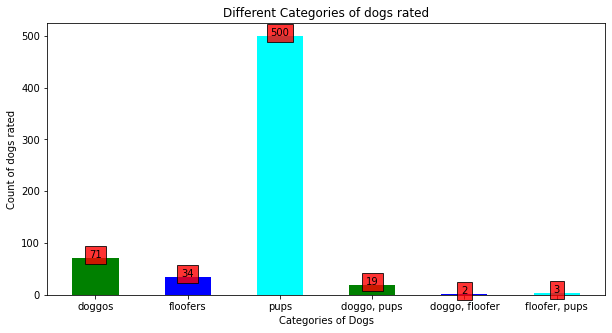

In [134]:
#creating a function to label the tips of the bar plot
def valuelabel(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',
                 bbox = dict(facecolor = 'red', alpha =0.8))
#importing the necessary library for visualization
from numpy.lib import polynomial
import matplotlib.pyplot as plt
x = ['doggos', 'floofers', 'pups', 'doggo, pups', 'doggo, floofer', 'floofer, pups']
y = [doggo, floof, pups, doggopups, doggofloofs, flooferpups]
fig = plt.figure(figsize = (10, 5))
#Plotting a Bar plot categoreis of dogs against count of dogs rated
plt.bar(x,y, color =['green', 'blue', 'cyan'], width = 0.5)
valuelabel(x, y)
plt.xlabel("Categories of Dogs")
plt.ylabel("Count of dogs rated")
plt.title("Different Categories of dogs rated")
polynomial
plt.show()

##The visualization above shows a number of the dogs rated on the twitter channel from 2015-2017 are pups